In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%natplotlib inline
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',100)#显示最大列数

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['font.family'] = ['sans-serif']

UsageError: Line magic function `%natplotlib` not found.


In [21]:
train_data=pd.read_csv(r'D:\新桌面\机器学习\train_dataset\train_dataset.csv')
test_data=pd.read_csv(r'D:\新桌面\机器学习\test_dataset\test_dataset.csv')
sample_sub=pd.read_csv(r'D:\新桌面\机器学习\submit_example.csv')
train_data.head()

,用户编码,用户实名制是否通过核实,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,...,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数,信用分
0,a4651f98c82948b186bdcdc8108381b4,1,44,0,0,0,186,1,99.80,163.86,...,1,1,713,0,2740,7145,0,0,30,664
1,aeb10247db4e4d67b2550bbc42ff9827,1,18,0,0,1,5,1,29.94,153.28,...,0,0,414,0,2731,44862,0,0,0,530
2,5af23a1e0e77410abb25e9a7eee510aa,1,47,0,0,0,145,1,49.90,109.64,...,0,0,3391,0,0,4804,0,0,1,643
3,43c64379d3c24a15b8478851b22049e4,1,55,0,0,0,234,1,99.80,92.97,...,1,1,500,0,1931,3141,0,0,5,649
4,f1687f3b8a6f4910bd0b13eb634056e2,1,40,0,0,0,76,1,49.90,95.47,...,1,0,522,0,64,59,0,0,0,648


In [22]:
train_data.describe()

,用户实名制是否通过核实,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,用户账单当月总费用（元）,...,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数,信用分
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.00000,50000.00000,50000.000000,50000.000000,50000.00000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.99022,37.883440,0.003720,0.048800,0.088580,96.448680,0.700100,53.415929,98.732081,99.575130,...,0.47442,0.37412,1148.815260,1.197840,971.50308,3.366519e+03,0.704420,0.553340,19.117120,618.053060
std,0.09841,11.613239,0.060879,0.215452,0.284139,59.176593,0.458218,61.812022,60.757758,65.327335,...,0.49935,0.48390,3992.957952,44.469584,3006.16776,1.151006e+04,28.721302,7.735913,170.074772,42.443022
min,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,422.000000
25%,1.00000,30.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,54.180000,52.675000,...,0.00000,0.00000,18.000000,0.000000,6.00000,1.000000e+01,0.000000,0.000000,0.000000,594.000000
50%,1.00000,36.000000,0.000000,0.000000,0.000000,94.000000,1.000000,49.900000,89.320000,89.620000,...,0.00000,0.00000,250.000000,0.000000,267.00000,3.350000e+02,0.000000,0.000000,0.000000,627.000000
75%,1.00000,45.000000,0.000000,0.000000,0.000000,139.000000,1.000000,99.800000,131.160000,133.945000,...,1.00000,1.00000,932.000000,0.000000,1147.25000,2.423250e+03,0.000000,0.000000,4.000000,649.000000
max,1.00000,111.000000,1.000000,1.000000,1.000000,288.000000,1.000000,998.000000,840.570000,1164.290000,...,1.00000,1.00000,234336.000000,8235.000000,496238.00000,1.382227e+06,5856.000000,474.000000,13965.000000,719.000000


In [23]:
train_data.columns

Index(['用户编码', '用户实名制是否通过核实', '用户年龄', '是否大学生客户', '是否黑名单客户', '是否4G不健康客户',
       '用户网龄（月）', '用户最近一次缴费距今时长（月）', '缴费用户最近一次缴费金额（元）', '用户近6个月平均消费值（元）',
       '用户账单当月总费用（元）', '用户当月账户余额（元）', '缴费用户当前是否欠费缴费', '用户话费敏感度', '当月通话交往圈人数',
       '是否经常逛商场的人', '近三个月月均商场出现次数', '当月是否逛过福州仓山万达', '当月是否到过福州山姆会员店', '当月是否看电影',
       '当月是否景点游览', '当月是否体育场馆消费', '当月网购类应用使用次数', '当月物流快递类应用使用次数',
       '当月金融理财类应用使用总次数', '当月视频播放类应用使用次数', '当月飞机类应用使用次数', '当月火车类应用使用次数',
       '当月旅游资讯类应用使用次数', '信用分'],
      dtype='object')

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   用户编码             50000 non-null  object 
 1   用户实名制是否通过核实      50000 non-null  int64  
 2   用户年龄             50000 non-null  int64  
 3   是否大学生客户          50000 non-null  int64  
 4   是否黑名单客户          50000 non-null  int64  
 5   是否4G不健康客户        50000 non-null  int64  
 6   用户网龄（月）          50000 non-null  int64  
 7   用户最近一次缴费距今时长（月）  50000 non-null  int64  
 8   缴费用户最近一次缴费金额（元）  50000 non-null  float64
 9   用户近6个月平均消费值（元）   50000 non-null  float64
 10  用户账单当月总费用（元）     50000 non-null  float64
 11  用户当月账户余额（元）      50000 non-null  int64  
 12  缴费用户当前是否欠费缴费     50000 non-null  int64  
 13  用户话费敏感度          50000 non-null  int64  
 14  当月通话交往圈人数        50000 non-null  int64  
 15  是否经常逛商场的人        50000 non-null  int64  
 16  近三个月月均商场出现次数     50000 non-null  int64  
 17  当月是否逛过福州仓山万达

In [62]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   用户编码             50000 non-null  object 
 1   用户实名制是否通过核实      50000 non-null  int64  
 2   用户年龄             49752 non-null  float64
 3   是否大学生客户          50000 non-null  int64  
 4   是否黑名单客户          50000 non-null  int64  
 5   是否4G不健康客户        50000 non-null  int64  
 6   用户网龄（月）          50000 non-null  int64  
 7   用户最近一次缴费距今时长（月）  50000 non-null  int64  
 8   缴费用户最近一次缴费金额（元）  50000 non-null  float64
 9   用户近6个月平均消费值（元）   50000 non-null  float64
 10  用户账单当月总费用（元）     50000 non-null  float64
 11  用户当月账户余额（元）      50000 non-null  float64
 12  缴费用户当前是否欠费缴费     50000 non-null  int64  
 13  用户话费敏感度          50000 non-null  int64  
 14  当月通话交往圈人数        50000 non-null  int64  
 15  是否经常逛商场的人        50000 non-null  int64  
 16  近三个月月均商场出现次数     50000 non-null  int64  
 17  当月是否逛过福州仓山万达

In [89]:
test_data.fillna(test_data.mean(),inplace=True) # 填充均值

In [90]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   用户编码             50000 non-null  object 
 1   用户实名制是否通过核实      50000 non-null  int64  
 2   用户年龄             50000 non-null  float64
 3   是否大学生客户          50000 non-null  int64  
 4   是否黑名单客户          50000 non-null  int64  
 5   是否4G不健康客户        50000 non-null  int64  
 6   用户网龄（月）          50000 non-null  int64  
 7   用户最近一次缴费距今时长（月）  50000 non-null  int64  
 8   缴费用户最近一次缴费金额（元）  50000 non-null  float64
 9   用户近6个月平均消费值（元）   50000 non-null  float64
 10  用户账单当月总费用（元）     50000 non-null  float64
 11  用户当月账户余额（元）      50000 non-null  float64
 12  缴费用户当前是否欠费缴费     50000 non-null  int64  
 13  用户话费敏感度          50000 non-null  int64  
 14  当月通话交往圈人数        50000 non-null  int64  
 15  是否经常逛商场的人        50000 non-null  int64  
 16  近三个月月均商场出现次数     50000 non-null  int64  
 17  当月是否逛过福州仓山万达

In [91]:
train_data['信用分'].describe()

count    50000.000000
mean       618.053060
std         42.443022
min        422.000000
25%        594.000000
50%        627.000000
75%        649.000000
max        719.000000
Name: 信用分, dtype: float64

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='信用分', ylabel='Density'>

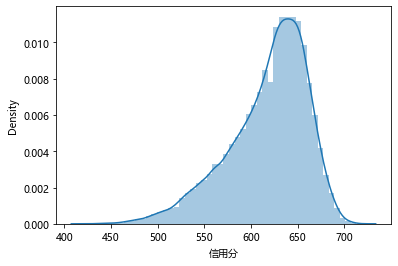

In [68]:
sns.distplot(train_data['信用分'])

<AxesSubplot:>

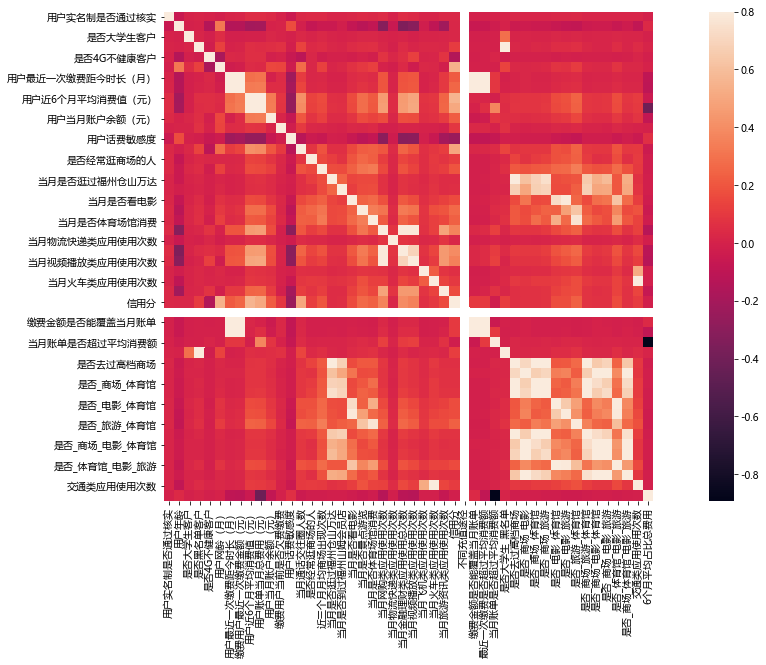

In [94]:
#查看相关系数
fig,ax=plt.subplots(figsize=(20,9))
sns.heatmap(train_data.corr(),vmax=0.8,square=True)

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Text(0.5, 1.0, 'Correlation coeficient of the variables')

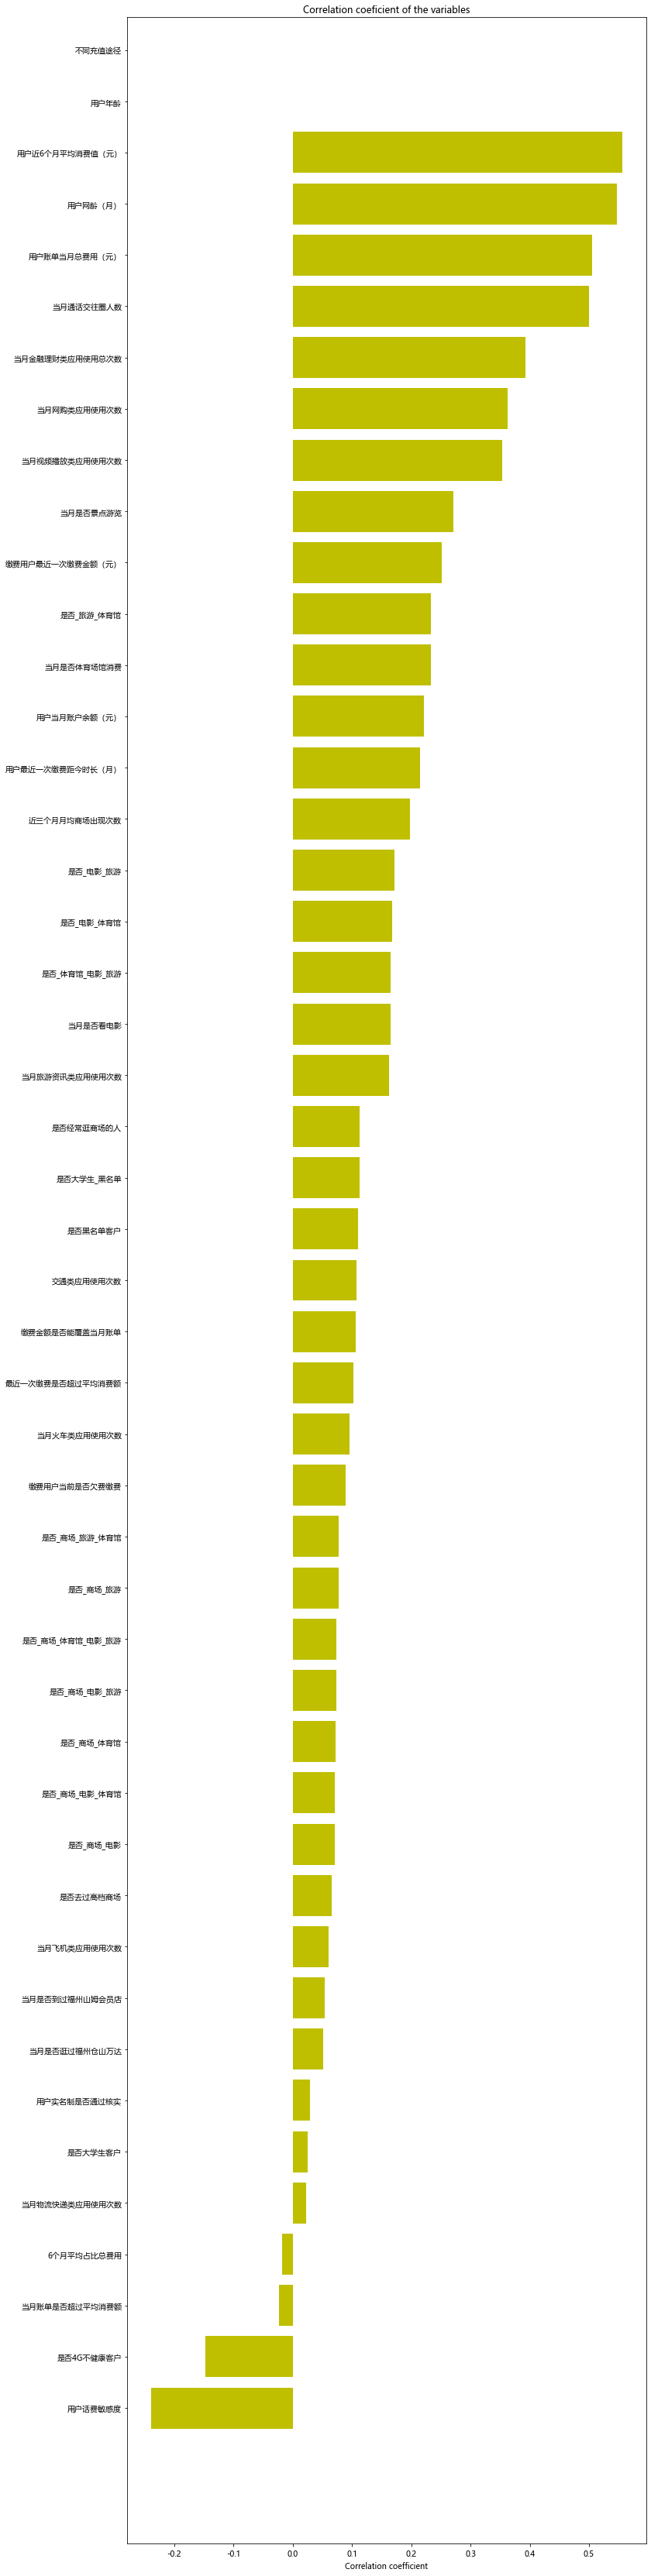

In [95]:
import numpy as np
x_cols=[col for col in train_data.columns if col not in ['信用分'] and train_data[col].dtype!='object']
labels=[]
values=[]

#判断各列和信用分的相关性
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_data[col].values,train_data['信用分'].values)[0,1])
    
corr_df=pd.DataFrame({'col_labels':labels,'corr_values':values})
corr_df=corr_df.sort_values(by='corr_values')

ind=np.arange(len(labels))
width=0.5
fig,ax=plt.subplots(figsize=(12,60))
rects=ax.barh(ind,np.array(corr_df.corr_values.values),color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values,rotation='horizontal')
ax.set_xlabel('Correlation coefficient')
ax.set_title('Correlation coeficient of the variables')

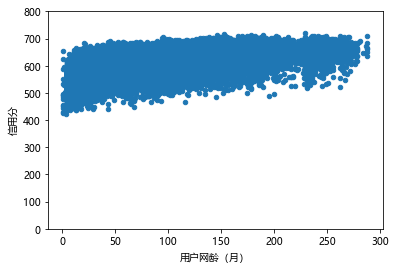

In [71]:
varName = "用户网龄（月）"
df_train.plot.scatter(x=varName,y="信用分",ylim=(0,800))
plt.show()

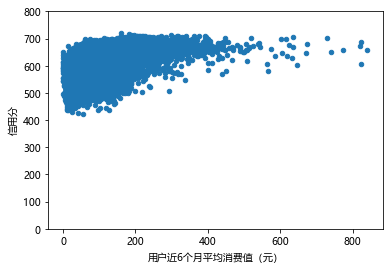

In [72]:
varName = "用户近6个月平均消费值（元）"
df_train.plot.scatter(x=varName,y="信用分",ylim=(0,800))
plt.show()

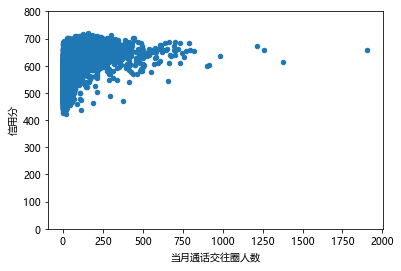

In [73]:
varName = "当月通话交往圈人数"
df_train.plot.scatter(x=varName,y="信用分",ylim=(0,800))
plt.show()

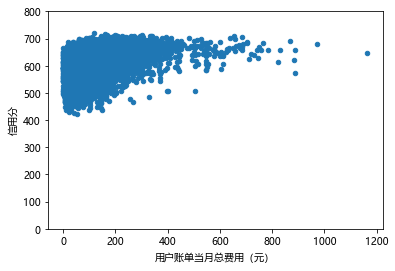

In [74]:
varName = "用户账单当月总费用（元）"
df_train.plot.scatter(x=varName,y="信用分",ylim=(0,800))
plt.show()

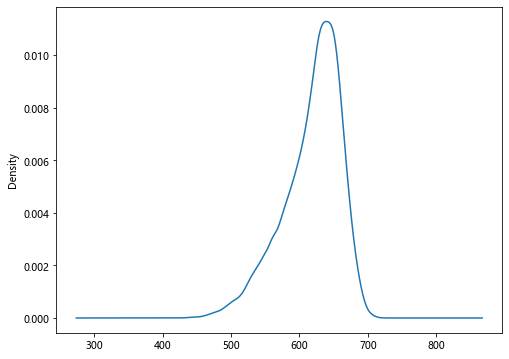

In [75]:
#密度曲线
def plot_kde(data):
    plt.figure(figsize=(8,6))
    data.plot(kind='kde')

def plot_his(data):
    plt.figure(figsize=(8,6))
    sns.distplot(data.values,bins=50,kde=False)

plot_kde(train_data['信用分'])

# 特征工程

In [76]:
##top up amount, 充值金额是整数，和小数，应该对应不同的充值途径？
def produce_offline_feature(train_data):
    train_data['不同充值途径']=0
    train_data['不同充值途径'][(train_data['缴费用户最近一次缴费金额（元）']%10==0)&train_data['缴费用户最近一次缴费金额（元）']!=0]=1
    return train_data

train_data=produce_offline_feature(train_data)
test_data=produce_offline_feature(test_data)

<ipython-input-76-e0b0325785bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['不同充值途径'][(train_data['缴费用户最近一次缴费金额（元）']%10==0)&train_data['缴费用户最近一次缴费金额（元）']!=0]=1
<ipython-input-76-e0b0325785bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['不同充值途径'][(train_data['缴费用户最近一次缴费金额（元）']%10==0)&train_data['缴费用户最近一次缴费金额（元）']!=0]=1


In [77]:
##看importance，当月话费 和最近半年平均话费都很高，算一下当月/半年 -->稳定性
def produce_fee_rate(train_data):
    train_data['当前费用稳定性']=train_data['用户账单当月总费用（元）']/(train_data['用户近6个月平均消费值（元）']+1)
    
    ##当月话费/当月账户余额
    train_data['用户余额比例']=train_data['用户账单当月总费用（元）']/(train_data['用户当月账户余额（元）']+1)
    return train_data

train_data=produce_offline_feature(train_data)
test_data=produce_offline_feature(test_data)

<ipython-input-76-e0b0325785bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['不同充值途径'][(train_data['缴费用户最近一次缴费金额（元）']%10==0)&train_data['缴费用户最近一次缴费金额（元）']!=0]=1
<ipython-input-76-e0b0325785bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['不同充值途径'][(train_data['缴费用户最近一次缴费金额（元）']%10==0)&train_data['缴费用户最近一次缴费金额（元）']!=0]=1


In [78]:
#获取特征
def get_features(data):
    data.loc[data['用户年龄']==0,'用户年龄']=data['用户年龄'].mode()
    data['缴费金额是否能覆盖当月账单']=data['缴费用户最近一次缴费金额（元）']-data['用户账单当月总费用（元）']
    data['最近一次缴费是否超过平均消费额']=data['缴费用户最近一次缴费金额（元）']-data['用户近6个月平均消费值（元）']
    data['当月账单是否超过平均消费额']=data['用户账单当月总费用（元）']-data['用户近6个月平均消费值（元）']
    
    #映射年龄
    def map_age(x):
        if x<=18:
            return 1
        elif x<=30:
            return 2
        elif x<=35:
            return 3
        elif x<=45:
            return 4
        else:
            return 5
    data['是否大学生_黑名单']=data['是否大学生客户']+data['是否黑名单客户']
    data['是否去过高档商场']=data['当月是否到过福州山姆会员店']+data['当月是否逛过福州仓山万达']
    data['是否去过高档商场']=data['是否去过高档商场'].map(lambda x:1 if x>=1 else 0)
    data['是否_商场_电影']=data['是否去过高档商场']*data['当月是否看电影']
    data['是否_商场_体育馆']=data['是否去过高档商场']*data['当月是否体育场馆消费']
    data['是否_商场_旅游']=data['是否去过高档商场']*data['当月是否景点游览']
    data['是否_电影_体育馆']=data['当月是否看电影']*data['当月是否体育场馆消费']
    data['是否_电影_旅游']=data['当月是否看电影']*data['当月是否景点游览']
    data['是否_旅游_体育馆']=data['当月是否景点游览']*data['当月是否体育场馆消费']
    
    data['是否_商场_旅游_体育馆']=data['是否去过高档商场']*data['当月是否景点游览']*data['当月是否体育场馆消费']
    data['是否_商场_电影_体育馆']=data['是否去过高档商场']*data['当月是否看电影']*data['当月是否体育场馆消费']
    data['是否_商场_电影_旅游']=data['是否去过高档商场']*data['当月是否看电影']*data['当月是否景点游览']
    data['是否_体育馆_电影_旅游']=data['当月是否体育场馆消费']*data['当月是否看电影']*data['当月是否景点游览']
    
    data['是否_商场_体育馆_电影_旅游']=data['是否去过高档商场']*data['当月是否体育场馆消费']*data['当月是否看电影']*data['当月是否景点游览']
    
    discretize_features=['交通类应用使用次数','当月物流快递类应用使用次数','当月飞机类应用使用次数','当月火车类应用使用次数','当月旅游资讯类应用使用次数']
    data['交通类应用使用次数']=data['当月飞机类应用使用次数']+data['当月火车类应用使用次数']
    
    data['6个月平均占比总费用']=data['用户近6个月平均消费值（元）']/data['用户账单当月总费用（元）']+1
    
    
    def map_discretize(x):
        if x==0:
            return 0
        elif x<=5:
            return 1
        elif x<=15:
            return 2
        elif x<=50:
            return 3
        elif x<=100:
            return 4
        else:
            return 5
        
    for col in discretize_features[:]:
        data[col]=data[col].map(lambda x:map_discretize(x))
    
    return data

train_data=get_features(train_data)
test_data=get_features(test_data)

In [79]:
def base_process(data):
    transform_value_feature=['用户年龄','用户网龄（月）','当月通话交往圈人数','近三个月月均商场出现次数','当月网购类应用使用次数','当月物流快递类应用使用次数'
                            ,'当月金融理财类应用使用总次数','当月视频播放类应用使用次数','当月飞机类应用使用次数','当月火车类应用使用次数','当月旅游资讯类应用使用次数']
    user_fea=['缴费用户最近一次缴费金额（元）','用户近6个月平均消费值（元）','用户账单当月总费用（元）','用户当月账户余额（元）']
    log_features=['当月网购类应用使用次数','当月金融理财类应用使用总次数','当月物流快递类应用使用次数','当月视频播放类应用使用次数']
    
    #处理离散点
    for col in transform_value_feature+user_fea+log_features:
        #取出最高99.9%值
        ulimit=np.percentile(train_data[col].values,99.9)
        #取出最低0.1%值
        llimit=np.percentile(train_data[col].values,0.1)
        train_data.loc[train_data[col]>ulimit,col]=ulimit
        train_data.loc[train_data[col]<llimit,col]=llimit
        
    for col in user_fea+log_features:
        data[col]=data[col].map(lambda x:np.log1p(x))
    
    return data

train_data=base_process(train_data)
test_data=base_process(test_data)

# 特征重要度显示函数

In [80]:
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.show()

# 训练及预测

In [81]:
#para
params = {
    'learning_rate': 0.01,
    'boosting_type': 'gbdt',
    'objective': 'regression_l1',
    'metric': 'mae',
    'feature_fraction': 0.6,
    'bagging_fraction': 0.8,
    'bagging_freq': 2,
    'num_leaves': 31,
    'verbose': -1,
    'max_depth': -1,
    'reg_alpha':2.2,
    'reg_lambda':1.4,
    'nthread': 8
}

In [82]:
from sklearn.model_selection import KFold
import lightgbm as lgb
cv_pred_all = 0
en_amount = 3

oof_lgb1=np.zeros(len(train_data))
prediction_lgb1=np.zeros(len(test_data))

for seed in range(en_amount):
    NFOLDS = 5
    train_label = train_data['信用分']
    
    kfold = KFold(n_splits=NFOLDS, shuffle=True, random_state=seed)
    kf = kfold.split(train_data, train_label)

    train_data_use = train_data.drop(['用户编码','信用分'], axis=1)
    test_data_use = test_data.drop(['用户编码'], axis=1)


    cv_pred = np.zeros(test_data.shape[0])
    valid_best_l2_all = 0

    feature_importance_df = pd.DataFrame()
    count = 0
    for i, (train_fold, validate) in enumerate(kf):
        print('fold: ',i, ' training')
        X_train, X_validate, label_train, label_validate = \
        train_data_use.iloc[train_fold, :], train_data_use.iloc[validate, :], \
        train_label[train_fold], train_label[validate]
        dtrain = lgb.Dataset(X_train, label_train)
        dvalid = lgb.Dataset(X_validate, label_validate, reference=dtrain)
        bst = lgb.train(params, dtrain, num_boost_round=10000, valid_sets=dvalid, verbose_eval=-1,early_stopping_rounds=250)
        cv_pred += bst.predict(test_data_use, num_iteration=bst.best_iteration)
        valid_best_l2_all += bst.best_score['valid_0']['l1']
        
        oof_lgb1[validate]=bst.predict(X_validate,num_iteration=bst.best_iteration)
        prediction_lgb1+=bst.predict(test_data_use,num_iteration=bst.best_iteration)/kfold.n_splits

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = list(X_train.columns)
        fold_importance_df["importance"] = bst.feature_importance(importance_type='split', iteration=bst.best_iteration)
        fold_importance_df["fold"] = count + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        count += 1

    cv_pred /= NFOLDS
    valid_best_l2_all /= NFOLDS
    
    cv_pred_all += cv_pred
cv_pred_all /= en_amount
prediction_lgb1/=en_amount
print('cv score for valid is: ', 1/(1+valid_best_l2_all))

fold:  0  training


D:\Anaconda\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Anaconda\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[3307]	valid_0's l1: 14.7221
fold:  1  training
Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[2838]	valid_0's l1: 14.7588
fold:  2  training
Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[3465]	valid_0's l1: 14.5566
fold:  3  training
Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[4092]	valid_0's l1: 14.5848
fold:  4  training
Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[2840]	valid_0's l1: 14.7456
fold:  0  training
Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[2700]	valid_0's l1: 14.6268
fold:  1  training
Training until validation scores don't improve for 250 rounds
Early stopping, best iteration is:
[3039]	valid_0's l1: 14.6923
fold

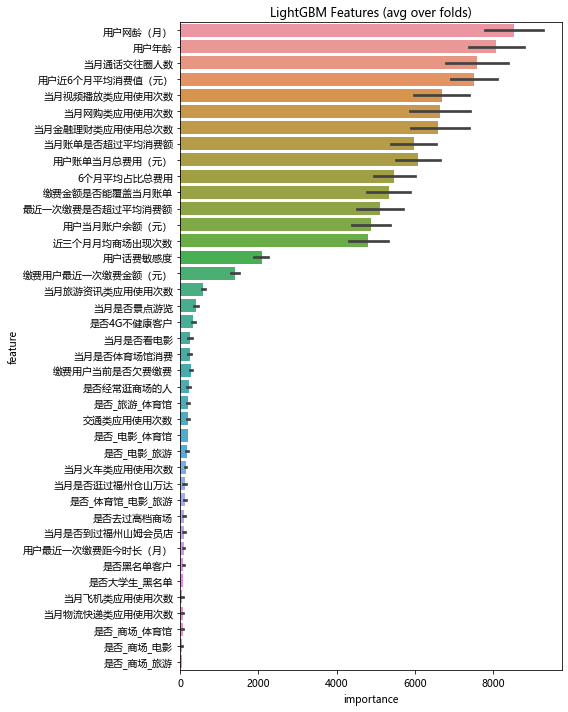

In [83]:
display_importances(feature_importance_df)

In [88]:
import xgboost as xgb
xgb_params={'eta': 0.005, 'max_depth': 10, 'subsample': 0.8, 'colsample_bytree': 0.8, 
          'objective': 'reg:linear', 'eval_metric': 'mae', 'silent': True, 'nthread': 8}
from sklearn.model_selection import KFold
cv_pred_allxgb=0
en_amount=3
oof_xgb1=np.zeros(len(train_data))
prediction_xgb1=np.zeros(len(test_data))
for seed in range(en_amount):
    NFOLDS=5
    train_label=train_data['信用分']
    kfold=KFold(n_splits=NFOLDS, shuffle=True, random_state=seed+2019)
    kf=kfold.split(train_data,train_label)
    
    train_data_use = train_data.drop(['用户编码','信用分'], axis=1)
    test_data_use = test_data.drop(['用户编码'], axis=1)
    
    cv_pred = np.zeros(test_data.shape[0])
    valid_best_l2_all = 0
    
    feature_importance_df = pd.DataFrame()
    count = 0
    
    for i, (train_fold, validate) in enumerate(kf):
        print('fold: ',i, ' training')
        X_train, X_validate, label_train, label_validate = train_data_use.iloc[train_fold, :], train_data_use.iloc[validate, :], train_label[train_fold], train_label[validate]
        dtrain = xgb.DMatrix(X_train, label_train)
        dvalid = xgb.DMatrix(X_validate, label_validate)
        watchlist = [(dtrain, 'train'), (dvalid, 'valid_data')]
        bst = xgb.train(dtrain=dtrain, num_boost_round=10000, evals=watchlist, early_stopping_rounds=100, verbose_eval=300, params=xgb_params)
        cv_pred += bst.predict(xgb.DMatrix(test_data_use), ntree_limit=bst.best_ntree_limit)
        oof_xgb1[validate]=bst.predict(xgb.DMatrix(X_validate),ntree_limit=bst.best_ntree_limit)
        prediction_xgb1+=bst.predict(xgb.DMatrix(test_data_use),ntree_limit=bst.best_ntree_limit)/kfold.n_splits
        count += 1
        
    cv_pred /= NFOLDS
    cv_pred_allxgb+=cv_pred
cv_pred_allxgb /= en_amount

fold:  0  training
[17:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mae:614.39551	valid_data-mae:614.76373
[300]	train-mae:136.71886	valid_data-mae:136.79027
[600]	train-mae:31.76020	valid_data-mae:32.54467
[900]	train-mae:13.99686	valid_data-mae:16.16997
[1200]	train-mae:11.88502	valid_data-mae:14.87574
[1500]	train-mae:11.13395	valid_data-mae:14.73823
[1800]	train-mae:10.56091	valid_data-mae:14.71657
[2100]	train-mae:10.04785	valid_data-mae:

XGBoostError: [17:47:53] C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/data/data.cc:981: Check failed: valid: Input data contains `inf` or `nan`

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_error
# 将lgb和xgb的结果进行stacking
train_stack = np.vstack([oof_lgb1,oof_xgb1]).transpose()
test_stack = np.vstack([prediction_lgb1, prediction_xgb1]).transpose()

folds_stack = RepeatedKFold(n_splits=5, n_repeats=2, random_state=2019)
oof_stack = np.zeros(train_stack.shape[0])
predictions = np.zeros(test_stack.shape[0])
target=train_data['信用分']
for fold_, (trn_idx, val_idx) in enumerate(folds_stack.split(train_stack,target)):
    print("fold {}".format(fold_))
    trn_data, trn_y = train_stack[trn_idx], target.iloc[trn_idx].values
    val_data, val_y = train_stack[val_idx], target.iloc[val_idx].values
    
    clf_3 = BayesianRidge()
    clf_3.fit(trn_data, trn_y)
    
    oof_stack[val_idx] = clf_3.predict(val_data)
    predictions += clf_3.predict(test_stack) / 10
    
mean_absolute_error(target.values, oof_stack)

In [54]:
test_data_sub1 = test_data[['用户编码']]
test_data_sub1['score'] =  predictions
test_data_sub1.columns = ['id','score']
test_data_sub1['score1'] = cv_pred_all

<ipython-input-54-589482d57485>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_sub1['score'] =  predictions
<ipython-input-54-589482d57485>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_sub1['score1'] = cv_pred_all


In [55]:
test_data_sub1['score'] = test_data_sub1['score'].apply(lambda x: int(np.round(x)))

<ipython-input-55-0bb5fbebbd40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_sub1['score'] = test_data_sub1['score'].apply(lambda x: int(np.round(x)))


In [56]:
test_data_sub1.head()

,id,score,score1
0,7171737d49b143d1b38883a39e4a5730,602,603.175596
1,3af0a449d5424488912e8fb2bf4b9faa,529,531.674560
2,eb2cf02e0d5c4d1294dd73e776dbb441,671,671.930414
3,9c0f780ecb254670a11aa9e3f10777c5,673,673.923816
4,d794eed46c1e44f785a575f18b3023a5,657,658.130190


In [61]:
test_data_sub1[['id','score']].to_csv('D:/新桌面/机器学习/result.csv', index=False)
'写入成功'

'写入成功'